# LitPop class

## Introduction

`LitPop` is an [Exposures](climada_entity_Exposures.ipynb)-type class. It is used to initiate grided exposure data with estimates of either asset value, economic activity or population based on nightlight intensity and population count data. 

### Background

The modeling of economic disaster risk on a global scale requires high-resolution maps of exposed asset values. We have developed a generic and scalable method to downscale national asset value estimates proportional to a combination of nightlight intensity ("Lit") and population data ("Pop"). 

Asset exposure value is disaggregated to the grid points proportionally to $Lit^m Pop^n$, computed at each grid cell:


$Lit^mPop^n = Lit^m * Pop^n$, with $exponents = [m, n] \in \R^+$ (Default values are $m=n=1$).


For more information please refer to the related publication (https://doi.org/10.5194/essd-12-817-2020) and data archive (https://doi.org/10.3929/ethz-b-000331316).

*How to cite:* Eberenz, S., Stocker, D., Röösli, T., and Bresch, D. N.: _Asset exposure data for global physical risk assessment_, Earth Syst. Sci. Data, 12, 817–833, https://doi.org/10.5194/essd-12-817-2020, 2020.


### Input data

*Note*: All required data except for the population data from Gridded Population of the World (GPW) is downloaded automatically when an `LitPop.set_*` method is called.

#### Nightlight intensity
Black Marble annual composite of the VIIRS day-night band (Grayscale) at 15 arcsec resolution is downloaded from the NASA Earth Observatory: https://earthobservatory.nasa.gov/Features/NightLights (available for 2012 and 2016 at 15 arcsec resolution (~500m)).
The first time a nightlight image is used, it is downloaded and stored locally. This might take some time.

#### Population count
Gridded Population of the World (GPW), v4: Population Count, v4.10, v4.11 or later versions (2000, 2005, 2010, 2015, 2020), available from http://sedac.ciesin.columbia.edu/data/collection/gpw-v4/sets/browse.

The GPW file of the year closest to the requested year (`reference_year`) is required.
To download GPW data a (free) login for the NASA SEDAC website is required.

Direct download links are avilable, also for older versions, i.e.:
- v4.11: http://sedac.ciesin.columbia.edu/downloads/data/gpw-v4/gpw-v4-population-count-rev11/gpw-v4-population-count-rev11_2015_30_sec_tif.zip
- v4.10: http://sedac.ciesin.columbia.edu/downloads/data/gpw-v4/gpw-v4-population-count-rev10/gpw-v4-population-count-rev10_2015_30_sec_tif.zip, 
- Overview over all versions of GPW v.4: https://beta.sedac.ciesin.columbia.edu/data/collection/gpw-v4/sets/browse

The population data from GWP needs to be downloaded manually as TIFF from this site and placed in the `SYSTEM_DIR` folder of your climada installation.

### Downloading existing LitPop asset exposure data

Readily computed LitPop asset exposure data based on $Lit^1Pop^1$ for 224 countries, distributing produced capital / non-financial wealth of 2014 at a resolution of 30 arcsec can be downloaded from the ETH Research Repository: https://doi.org/10.3929/ethz-b-000331316.
The dataset contains gridded data for more than 200 countries as CSV files.

## Attributes

The `LitPop` class inherits from [`Exposures`](climada_entity_Exposures.ipynb#Exposures-class).
It adds the following attributes:

        exponents : Defining powers (m, n) with which nightlights and population go into Lit**m * Pop**n.
        fin_mode : Socio-economic indicator to be used as total asset value for diaggregation.
        gpw_version : Version number of GPW population data, e.g. 11 for v4.11

### fin_mode
The choice of `fin_mode` is crucial. Implemented choices are:
* `'pc'`: produced capital (Source: World Bank), incl. manufactured or built assets such as machinery, equipment, and physical structures. The pc-data is stored in the subfolder *data/system/Wealth-Accounts_CSV/*. Source: https://datacatalog.worldbank.org/dataset/wealth-accounting
* `'pop'`: population count (source: GPW, same as gridded population)
* `'gdp'`: gross-domestic product (Source: World Bank)
* `'income_group'`: gdp multiplied by country's income group+1
* `'nfw'`: non-financial household wealth (Source: Credit Suissey)
* `'tw'`: total household wealth (Source: Credit Suisse)
* `'norm'`: normalized, total value of country or region is 1.
* `'none'`: None – LitPop per pixel is returned unchanged

Regarding the GDP (nominal GDP at current USD) and income group values, they are obtained from the [World Bank](https://data.worldbank.org) using the [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) API. If a value is missing, the value of the closest year is considered. When no values are provided from the World Bank, we use the [Natural Earth](https://www.naturalearthdata.com) repository values.

## Key Methods
* `set_countries`: set exposure for one or more countries, see section `set_countries` below.
* `set_country`: alias of `set_countries`
* `set_lit`: wrapper around `set_countries` and `set_custom_shape` to load nightlight data to exposure.
* `set_pop`: wrapper around `set_countries` and `set_custom_shape_population` to load pure population data to exposure. This can be used to initiate a population exposure set.
* `set_custom_shape_from_countries`: given a shape and a list of countries, exposure is initiated for the countries and then cropped to the shape. See section *Set custom shapes* below.
* `set_custom_shape`: given any shape or geometry and an estimate of total values, exposure is initiated for the shape directly. See section *Set custom shapes* below.


In [2]:
# Import class LitPop:
from climada.entity import LitPop

### `set_countries`
In the following, we will create exposure data sets and plots for a variety of countries, comparing different settings.
#### Default Settings
Per default, the exposure entity was initiated using the default parameters, i.e. a resolution of 30 arcsec, produced capital 'pc' as total asset value and using the exponents $(1, 1)$.

2021-06-25 11:28:33,942 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: CHE (756)...

2021-06-25 11:28:33,943 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW population data: 2020
2021-06-25 11:28:33,944 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-25 11:28:38,136 - climada.util.finance - INFO - GDP CHE 2014: 7.092e+11.
2021-06-25 11:28:38,586 - climada.util.finance - INFO - GDP CHE 2018: 7.051e+11.
2021-06-25 11:28:38,933 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: LIE (438)...

2021-06-25 11:28:38,934 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW population data: 2020
2021-06-25 11:28:38,935 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-25 11:28:39,053 - climada.util.finance - WARNING

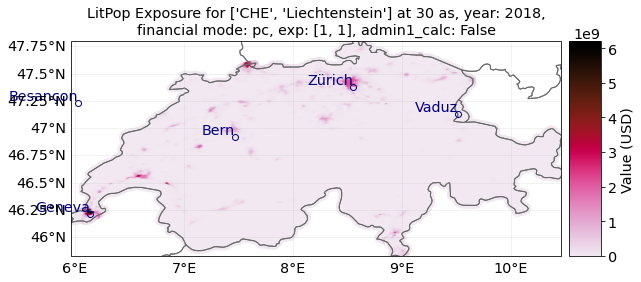

In [5]:
# Initiate a default LitPop exposure entity for Switzerland and Liechtenstein (ISO3-Codes 'CHE' and 'LIE'):
exp = LitPop()
try:
    exp.set_countries(['CHE', 'Liechtenstein']) # you can provide either single countries or a list of countries
except FileExistsError as err:
    print("Reason for error: The GPW population data has not been downloaded, c.f. section 'Input data' above.")
    raise err
exp.plot_scatter()

# Note that `exp.gdf.region_id` is a number identifying each country:
print('\n Region IDs (`region_id`) in this exposure:')
print(exp.gdf.region_id.unique())

#### fin_mode, resolution and exponents
Instead on produced capital, we can also downscale other available macroeconomic indicators as estimates of asset value.
The indicator can be set via the parameter `fin_mode`, either to 'pc', 'pop', 'gdp', 'income_group', 'nfw', 'tw', 'norm', or 'none'.
See descriptions of each alternative above in the introduction.

We can also change the resolution via `res_arcsec` and the `exponents`.

The default resolution is 30 arcsec $\approx$ 1 km.
A resolution of 3600 arcsec = 1 degree corresponds to roughly 110 km close to the equator.
    
Let's initiate an exposure instance with the financial mode "income_group" and at a resoultion of 120 arcsec (roughly 4 km).

2021-06-23 11:50:02,676 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: CRI (188)...

2021-06-23 11:50:02,677 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-23 11:50:03,906 - climada.util.finance - INFO - GDP CRI 2019: 6.180e+10.
2021-06-23 11:50:03,948 - climada.util.finance - INFO - Income group CRI 2019: 3.
2021-06-23 11:50:03,960 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-23 11:50:03,960 - climada.entity.exposures.base - INFO - category_id not set.
2021-06-23 11:50:03,961 - climada.entity.exposures.base - INFO - cover not set.
2021-06-23 11:50:03,961 - climada.entity.exposures.base - INFO - deductible not set.
2021-06-23 11:50:03,962 - climada.entity.exposures.base - INFO - centr_ not set.
2021-06-23 11:50:03,967 - climada.util.coordinates - INFO - Raster from resolution 0.03333333333333144 to 0.03333333333333144.


<GeoAxesSubplot:title={'center':"LitPop Exposure for ['Costa Rica'] at 120 as, year: 2020, financial\nmode: income_group, exp: [1, 1], admin1_calc: False"}>

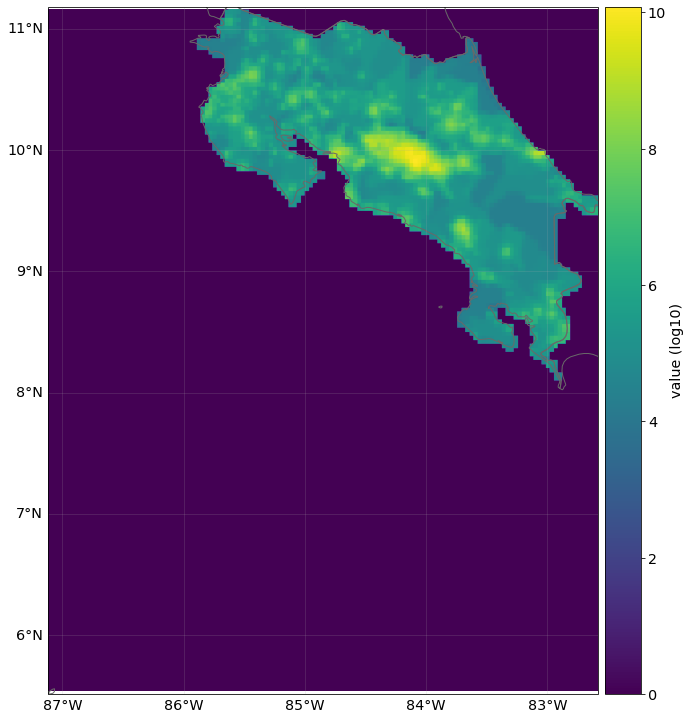

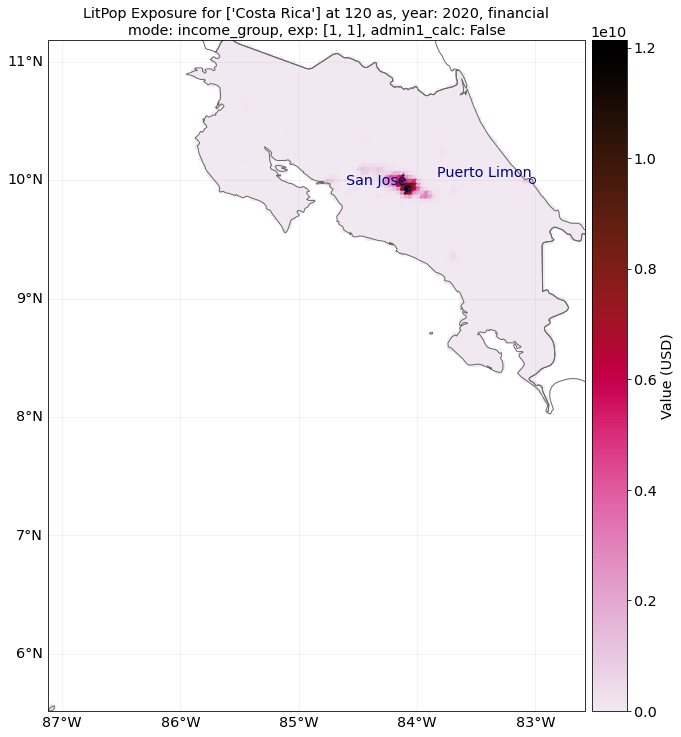

In [27]:
# Initiate a LitPop exposure entity for Costa Rica with varied resolution, fin_mode, and exponents:
exp = LitPop()
exp.set_country('Costa Rica', fin_mode='income_group', res_arcsec=120, exponents=(1,1)) # change the parameters and see what happens... 
# exp.set_country('Costa Rica', fin_mode='gdp', res_arcsec=90, exponents=(3,0)) # example of variation
exp.plot_raster() # note the log scale of the colorbar
exp.plot_scatter()

#### Reference year

Additionally, we can change the year our exposure is supposed to represent. For this, nightlight and population data  are used that are closest to the requested years. Macroeconomic indicators like produced capital are interpolated from available data or scaled proportional to GDP.

Let's load a population exposure map for Switzerland in 2000 and 2021 with a resolution of 300 arcsec:

2021-06-23 11:57:57,916 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: CHE (756)...

2021-06-23 11:57:57,918 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-23 11:57:58,302 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-23 11:57:58,302 - climada.entity.exposures.base - INFO - category_id not set.
2021-06-23 11:57:58,303 - climada.entity.exposures.base - INFO - cover not set.
2021-06-23 11:57:58,304 - climada.entity.exposures.base - INFO - deductible not set.
2021-06-23 11:57:58,305 - climada.entity.exposures.base - INFO - centr_ not set.
2021-06-23 11:57:58,569 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: CHE (756)...

2021-06-23 11:57:58,570 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2021. Using nearest available year for GPW population data: 2020
2021-06-23 11:57:58,571 - climada.entity.exposures.litpop.

'Note the difference in total values on the color bar.'

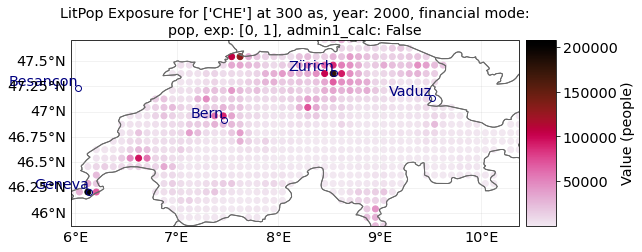

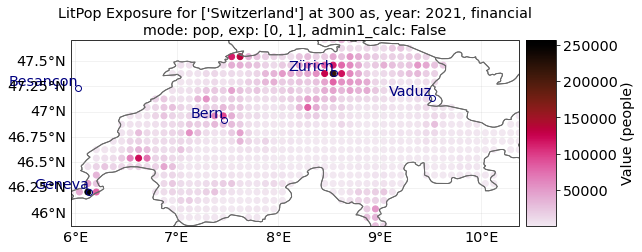

In [29]:
pop_2000 = LitPop()
pop_2000.set_country('CHE', fin_mode='pop', res_arcsec=300, exponents=(0,1), reference_year=2000)
# Alternatively, we ca use `set_population`:
pop_2021 = LitPop()
pop_2021.set_population(countries='Switzerland', res_arcsec=300, reference_year=2021)
# Since no population data for 2021 is available, the closest data point, 2020, is used (see LOGGER.warning)
pop_2000.plot_scatter()
pop_2021.plot_scatter()
"""Note the difference in total values on the color bar."""

### `set_nightlight_intensity` and `set_population`

These wrapper methods can be used to produce exposures that are showing purely nightlight intensity or purely population count.

2021-06-23 14:01:33,293 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: JAM (388)...

2021-06-23 14:01:33,297 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2016. Using nearest available year for GPW population data: 2015
2021-06-23 14:01:33,299 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-23 14:01:34,441 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-23 14:01:34,442 - climada.entity.exposures.base - INFO - category_id not set.
2021-06-23 14:01:34,442 - climada.entity.exposures.base - INFO - cover not set.
2021-06-23 14:01:34,443 - climada.entity.exposures.base - INFO - deductible not set.
2021-06-23 14:01:34,445 - climada.entity.exposures.base - INFO - centr_ not set.
2021-06-23 14:01:40,165 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: JAM (388)...

2021-06-23 14:01:40,167 - climada.entity.exposures.litpop.

<GeoAxesSubplot:title={'center':"LitPop Exposure for ['JAM'] at 30 as, year: 2020, financial mode: pc,\nexp: [1, 1], admin1_calc: False"}>

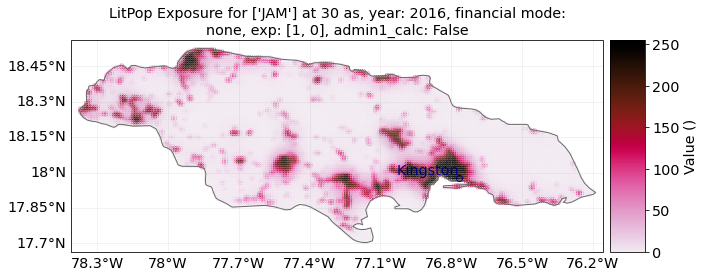

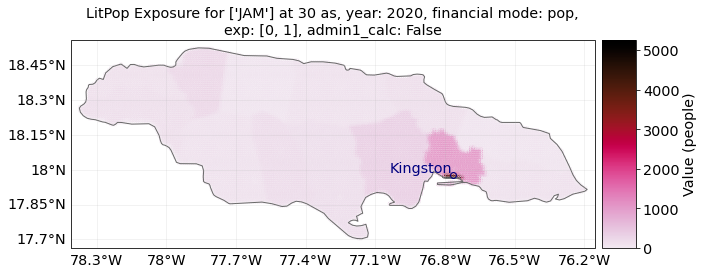

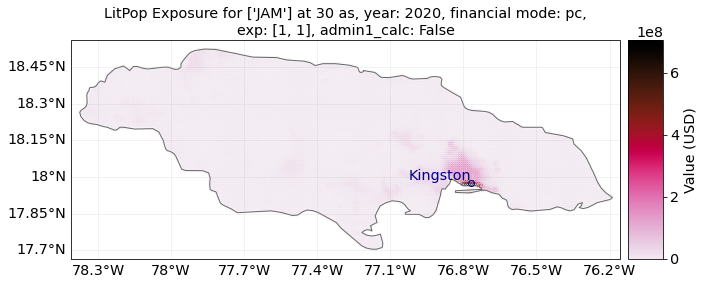

In [3]:
exp_nightlights = LitPop()
exp_population = LitPop()
res = 30
country = 'JAM' # Try different countries, i.e. 'JAM', 'CHE', 'RWA', 'MEX'
markersize = 4 # for plotting
buffer_deg=.04

exp_nightlights.set_nightlight_intensity(countries=country, res_arcsec=res) # nightlight intensity
exp_nightlights.plot_hexbin(linewidth=markersize, buffer=buffer_deg)
# Compare to the population map:
exp_population.set_population(countries=country, res_arcsec=res)
exp_population.plot_hexbin(linewidth=markersize, buffer=buffer_deg)
# Compare to default LitPop exposures:
exp = LitPop()
exp.set_countries('JAM', res_arcsec=res)
exp.plot_hexbin(linewidth=markersize, buffer=buffer_deg)

For **Switzerland**, population is resolved on the 3rd administrative level, with 2538 distinct geographical units. Therefore, the purely population-based map is highly resolved.

For **Jamaica**, population is only resolved on the 1st administrative level, with only 14 distinct geographical units. Therefore, the purely population-based map shows large monotonous patches. The combination of Lit and Pop results in a concentration of asset value estimates around the capital city Kingston.

## Set custom shapes <a class="anchor" id="custom_shape"></a>

The methods `LitPop.set_custom_shape_from_countries` and `LitPop.set_custom_shape` initiate a LitPop-exposure instance for a given custom shape instead of a country. This can be used to initiate exposure for admin1-regions, i.e. cantons, states, districts, - but also for bounding boxes etc.

The difference between the two methods is that for `set_custom_shape_from_countries`, the exposure for one or more whole countries is initiated first and then it is cropped to the shape. Please make sure that the shape is contained in the given countries.
With `set_custom_shape`, the shape is initiated directly which is much more resource efficient but requires a `total_value` to be provided by the user.

A population exposure for a custom shape can be initiated directly via `set_population` without providing `total_value`.

#### Example: State of Florida <a class="anchor" id="florida"></a>

Using `LitPop.set_custom_shape_from_countries` and `LitPop.set_custom_shape` we initiate LitPop exposures for Florida:

['Minnesota', 'Washington', 'Idaho', 'Montana', 'North Dakota', 'Michigan', 'Maine', 'Ohio', 'New Hampshire', 'New York', 'Vermont', 'Pennsylvania', 'Arizona', 'California', 'New Mexico', 'Texas', 'Alaska', 'Louisiana', 'Mississippi', 'Alabama', 'Florida', 'Georgia', 'South Carolina', 'North Carolina', 'Virginia', 'District of Columbia', 'Maryland', 'Delaware', 'New Jersey', 'Connecticut', 'Rhode Island', 'Massachusetts', 'Oregon', 'Hawaii', 'Utah', 'Wyoming', 'Nevada', 'Colorado', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma', 'Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Kentucky', 'Arkansas', 'Tennessee', 'West Virginia', 'Indiana']
Florida index: 20
2021-06-25 11:41:14,547 - climada.util.finance - INFO - GDP USA 2014: 1.753e+13.
2021-06-25 11:41:14,999 - climada.util.finance - INFO - GDP USA 2019: 2.143e+13.
2021-06-25 11:41:15,006 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-25 11:41:15,910 - climada.util.coordinates - INFO - Setting regio

/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-25 11:41:16,972 - climada.util.coordinates - INFO - Setting region_id 1 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-25 11:41:17,984 - climada.util.coordinates - INFO - Setting region_id 1 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-25 11:41:19,033 - climada.util.coordinates - INFO - Setting region_id 4 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-25 11:41:20,128 - climada.util.coordinates - INFO - Setting region_id 1 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-25 11:41:21,152 - climada.util.coordinates - INFO - Setting region_id 8 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-25 11:41:22,193 - climada.util.coordinates - INFO - Setting region_id 3 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-06-25 11:41:23,207 - climada.util.coordinates - INFO - Setting region_id 5 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'


 Runtime `set_custom_shape` : 9.01 sec.



<GeoAxesSubplot:title={'center':'LitPop Exposure for custom shape at 600 as, year: 2020, exp: [1, 1]'}>

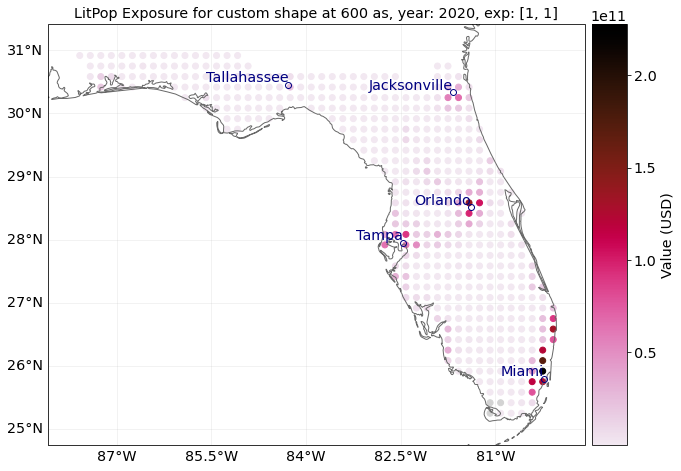

In [13]:
import time
import climada.util.coordinates as u_coord
import climada.entity.exposures.litpop as lp

country_iso3a = 'USA'
state_name = 'Florida'
reslution_arcsec = 600 
"""First, we need to get the shape of Florida:"""
admin1_info, admin1_shapes = u_coord.get_admin1_info(country_iso3a)
admin1_info = admin1_info[country_iso3a]
admin1_shapes = admin1_shapes[country_iso3a]
admin1_names = [record['name'] for record in admin1_info]
print(admin1_names)
for idx, name in enumerate(admin1_names):
    if admin1_names[idx]==state_name:
        break
print('Florida index: ' + str(idx))

"""Secondly, we estimate the `total_value`"""
# `total_value` required user input for `set_custom_shape`, here we assume 5% of total value of the whole USA:
total_value = 0.05 * lp.get_total_value_per_country(country_iso3a, 'pc', 2020)

"""Then, we can initiate the exposures for Florida:"""
exp = LitPop()
start = time.process_time()
exp.set_custom_shape(admin1_shapes[idx], total_value, res_arcsec=600, reference_year=2020)
print(f'\n Runtime `set_custom_shape` : {time.process_time() - start:1.2f} sec.\n')
exp.plot_scatter(vmin=100, buffer=.5)


2021-06-25 11:40:25,127 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: USA (840)...

2021-06-25 11:40:25,129 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-25 11:40:54,832 - climada.util.finance - INFO - GDP USA 2014: 1.753e+13.
2021-06-25 11:40:55,361 - climada.util.finance - INFO - GDP USA 2019: 2.143e+13.
2021-06-25 11:40:55,400 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-25 11:40:55,401 - climada.entity.exposures.base - INFO - category_id not set.
2021-06-25 11:40:55,401 - climada.entity.exposures.base - INFO - cover not set.
2021-06-25 11:40:55,402 - climada.entity.exposures.base - INFO - deductible not set.
2021-06-25 11:40:55,403 - climada.entity.exposures.base - INFO - centr_ not set.
2021-06-25 11:41:00,182 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-25 11:41:00,184 - climada.entity.exposures.base - INFO - category_id not set.
2021-06

'Note the differences in computational speed and total value between the two approaches'

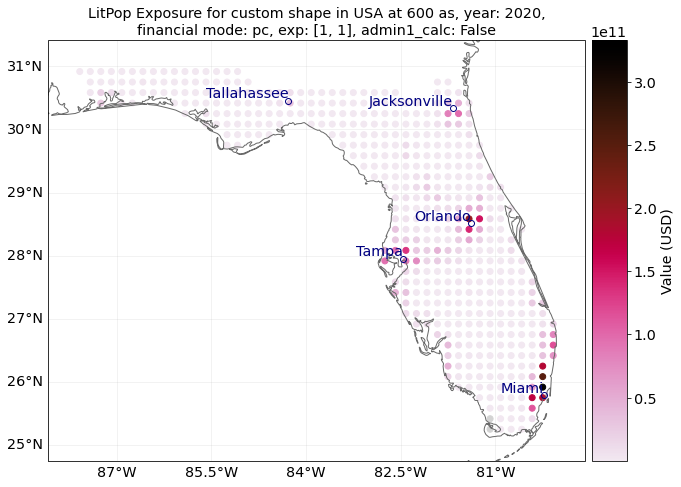

In [12]:
# `set_custom_shape_from_countries` does not require `total_value`, but is slower to compute than `set_custom_shape`,
# because first, the exposure for the whole USA is initiated:
exp = LitPop()
start = time.process_time()
exp.set_custom_shape_from_countries(admin1_shapes[idx], country_iso3a, res_arcsec=600, reference_year=2020)
print(f'\n Runtime `set_custom_shape_from_countries` : {time.process_time() - start:1.2f} sec.\n')
exp.plot_scatter(vmin=100, buffer=.5)
"""Note the differences in computational speed and total value between the two approaches"""

#### Example: Zurich city area

You can also define your own shape as a Polygon:

2021-06-25 11:41:55,436 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW population data: 2020
2021-06-25 11:41:55,441 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-25 11:41:55,575 - climada.util.coordinates - INFO - Setting region_id 972 points.


/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area



 Runtime `set_custom_shape` : 1.11 sec.

2021-06-25 11:41:57,492 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: CHE (756)...

2021-06-25 11:41:57,493 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW population data: 2020
2021-06-25 11:41:57,494 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-06-25 11:42:01,417 - climada.util.finance - INFO - GDP CHE 2014: 7.092e+11.
2021-06-25 11:42:01,861 - climada.util.finance - INFO - GDP CHE 2018: 7.051e+11.
2021-06-25 11:42:01,902 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-06-25 11:42:01,903 - climada.entity.exposures.base - INFO - category_id not set.
2021-06-25 11:42:01,903 - climada.entity.exposures.base - INFO - cover not set.
2021-06-25 11:42:01,904 - climada.entity.exposures.base - INFO - deductible not set.
2021-06-25 11:42:01,904 - climada.entity.exposures.base - IN

/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1117: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area



 Runtime `set_population` : 1.33 sec.



'Population exposure for a custom shape can be initiated directly via `set_population` without providing `total_value`'

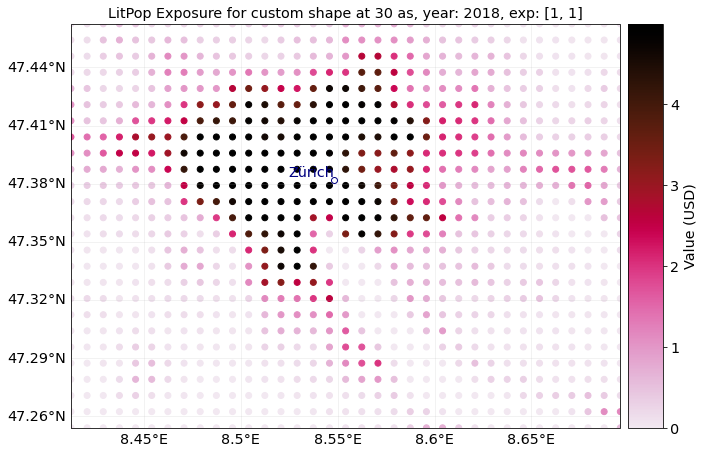

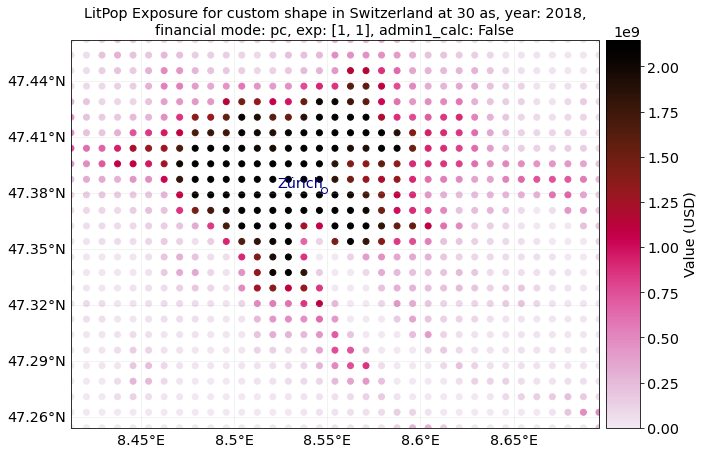

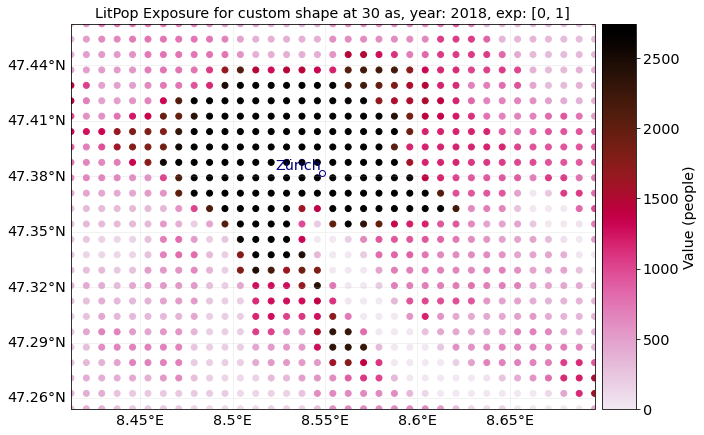

In [14]:
import time
from shapely.geometry import Polygon

"""initiate LitPop exposures for a geographical box around the city of Zurich:"""
bounds = (8.41, 47.25, 8.70, 47.47) # (min_lon, max_lon, min_lat, max_lat)
total_value=1000 # required user input for `set_custom_shape`, here we just assume USD 1000 of total value
shape = Polygon([
                (bounds[0], bounds[3]),
                (bounds[2], bounds[3]),
                (bounds[2], bounds[1]),
                (bounds[0], bounds[1])
                ])
exp = LitPop()
import time
start = time.process_time()
exp.set_custom_shape(shape, total_value)
print(f'\n Runtime `set_custom_shape` : {time.process_time() - start:1.2f} sec.\n')
exp.plot_scatter()
# `set_custom_shape_from_countries` does not require `total_value`, but is slower to compute:
start = time.process_time()
exp.set_custom_shape_from_countries(shape, 'Switzerland')
print(f'\n Runtime `set_custom_shape_from_countries` : {time.process_time() - start:1.2f} sec.\n')
exp.plot_scatter()
"""Note the difference in total value between the two exposure sets!"""

"""For comparison, initiate population exposure for a geographical box around the city of Zurich:"""
exp_pop = LitPop()
start = time.process_time()
exp_pop.set_population(shape=shape)
print(f'\n Runtime `set_population` : {time.process_time() - start:1.2f} sec.\n')
exp_pop.plot_scatter()

"""Population exposure for a custom shape can be initiated directly via `set_population` without providing `total_value`"""

### Sub-national (admin-1) GDP as intermediate downscaling layer <a class="anchor" id="admin1"></a>

In order to improve downscaling for countries with large regional differences within, a subnational breakdown of GDP can be used as an intermediate downscaling layer wherever available.

The sub-national (admin-1) GDP-breakdown needs to be added manually as a ".xls"-file to the folder `data/system/GSDP` in the CLIMADA-directory. Currently, such data is provided for more than 10 countries, including USA, India, and China.

The xls-file requires at least the following columns (with names specified in row 1):
- `State_Province`: Names of admin-1 regions, i.e. states, cantons, provinces. Names need to match the naming of admin-1 shapes in the data used by the python package `cartopy.io` (c.f. `shapereader.natural_earth(name='admin_1_states_provinces')`)
- `GSDP_ref`: value of sub-national GDP to be used (absolute or relative values)
- `Postal`, optional: Alternative identifier of region, if names do not match wioth cartopy. Needs to correspond to the Postal-identifiers used in the shapereader of `cartopy.io`.

Please note that while admin1-GDP will per definition improve the downscaling of *GDP*, it might not neccessarily improve the downscaling quality for other asset bases like produced capital (pc).
#### How To:
The intermediadte downscaling layer can be activated with the parameter `admin1_calc=True`.


In [5]:
# Initiate GDP-Entity for Switzerland, with and without admin1_calc:

ent_adm0 = LitPop()
ent_adm0.set_country('CHE', res_arcsec=120, fin_mode='gdp', admin1_calc=False)
ent_adm0.set_geometry_points()

ent_adm1 = LitPop()
ent_adm1.set_country('CHE', res_arcsec=120, fin_mode='gdp', admin1_calc=True)

ent_adm0.check()
ent_adm1.check()
print('Done.')

2021-09-09 12:41:00,329 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: CHE (756)...

2021-09-09 12:41:00,331 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2021-09-09 12:41:00,337 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2021-09-09 12:41:01,329 - climada.util.finance - INFO - GDP CHE 2018: 7.359e+11.
2021-09-09 12:41:01,366 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-09-09 12:41:01,369 - climada.entity.exposures.base - INFO - category_id not set.
2021-09-09 12:41:01,371 - climada.entity.exposures.base - INFO - cover not set.
2021-09-09 12:41:01,372 - climada.entity.exposures.base - INFO - deductible not set.
2021-09-09 12:41:01,374 - climada.entity.exposures.base - INFO - centr_ not set.
2021-09-09 12:41:01,379 - climada.util.coordinates - INFO - Setting geometry points.
2021-09-09 12:41:02,670 - cl

/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:03,520 - climada.entity.exposures.litpop.litpop - INFO - Ticino
2021-09-09 12:41:03,662 - climada.util.coordinates - INFO - Setting region_id 576 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:04,362 - climada.entity.exposures.litpop.litpop - INFO - Graubünden


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area


2021-09-09 12:41:04,548 - climada.util.coordinates - INFO - Setting region_id 1485 points.


/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:05,238 - climada.entity.exposures.litpop.litpop - INFO - Schaffhausen
2021-09-09 12:41:05,305 - climada.util.coordinates - INFO - Setting region_id 105 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:05,993 - climada.entity.exposures.litpop.litpop - INFO - Thurgau
2021-09-09 12:41:06,068 - climada.util.coordinates - INFO - Setting region_id 250 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:06,747 - climada.entity.exposures.litpop.litpop - INFO - Zürich
2021-09-09 12:41:06,846 - climada.util.coordinates - INFO - Setting region_id 304 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:07,529 - climada.entity.exposures.litpop.litpop - INFO - Aargau
2021-09-09 12:41:07,630 - climada.util.coordinates - INFO - Setting region_id 315 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:08,320 - climada.entity.exposures.litpop.litpop - INFO - Basel-Stadt
2021-09-09 12:41:08,360 - climada.util.coordinates - INFO - Setting region_id 10 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:09,068 - climada.entity.exposures.litpop.litpop - INFO - Basel-Landschaft
2021-09-09 12:41:09,130 - climada.util.coordinates - INFO - Setting region_id 133 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:09,822 - climada.entity.exposures.litpop.litpop - INFO - Sankt Gallen
2021-09-09 12:41:09,945 - climada.util.coordinates - INFO - Setting region_id 540 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:10,633 - climada.entity.exposures.litpop.litpop - INFO - Solothurn
2021-09-09 12:41:10,721 - climada.util.coordinates - INFO - Setting region_id 273 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:11,396 - climada.entity.exposures.litpop.litpop - INFO - Jura
2021-09-09 12:41:11,473 - climada.util.coordinates - INFO - Setting region_id 220 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:12,140 - climada.entity.exposures.litpop.litpop - INFO - Genève
2021-09-09 12:41:12,200 - climada.util.coordinates - INFO - Setting region_id 60 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:12,951 - climada.entity.exposures.litpop.litpop - INFO - Vaud
2021-09-09 12:41:13,100 - climada.util.coordinates - INFO - Setting region_id 888 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:13,798 - climada.entity.exposures.litpop.litpop - INFO - Neuchâtel
2021-09-09 12:41:13,875 - climada.util.coordinates - INFO - Setting region_id 200 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:14,563 - climada.entity.exposures.litpop.litpop - INFO - Bern
2021-09-09 12:41:14,750 - climada.util.coordinates - INFO - Setting region_id 1519 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:15,424 - climada.entity.exposures.litpop.litpop - INFO - Lucerne
2021-09-09 12:41:15,519 - climada.util.coordinates - INFO - Setting region_id 320 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:16,196 - climada.entity.exposures.litpop.litpop - INFO - Zug
2021-09-09 12:41:16,247 - climada.util.coordinates - INFO - Setting region_id 45 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:16,936 - climada.entity.exposures.litpop.litpop - INFO - Uri
2021-09-09 12:41:17,031 - climada.util.coordinates - INFO - Setting region_id 224 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:17,739 - climada.entity.exposures.litpop.litpop - INFO - Schwyz
2021-09-09 12:41:17,812 - climada.util.coordinates - INFO - Setting region_id 190 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:18,504 - climada.entity.exposures.litpop.litpop - INFO - Glarus
2021-09-09 12:41:18,588 - climada.util.coordinates - INFO - Setting region_id 121 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:19,268 - climada.entity.exposures.litpop.litpop - INFO - Nidwalden
2021-09-09 12:41:19,334 - climada.util.coordinates - INFO - Setting region_id 88 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:20,015 - climada.entity.exposures.litpop.litpop - INFO - Fribourg
2021-09-09 12:41:20,125 - climada.util.coordinates - INFO - Setting region_id 323 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:20,810 - climada.entity.exposures.litpop.litpop - INFO - Obwalden
2021-09-09 12:41:20,867 - climada.util.coordinates - INFO - Setting region_id 98 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:21,562 - climada.entity.exposures.litpop.litpop - INFO - Appenzell Ausserrhoden
2021-09-09 12:41:21,627 - climada.util.coordinates - INFO - Setting region_id 78 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:22,364 - climada.entity.exposures.litpop.litpop - INFO - Appenzell Innerrhoden
2021-09-09 12:41:22,427 - climada.util.coordinates - INFO - Setting region_id 63 points.


/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area
/Users/eberenzs/anaconda3/envs/climada_env/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2021-09-09 12:41:23,163 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-09-09 12:41:23,163 - climada.entity.exposures.base - INFO - category_id not set.
2021-09-09 12:41:23,164 - climada.entity.exposures.base - INFO - cover not set.
2021-09-09 12:41:23,165 - climada.entity.exposures.base - INFO - deductible not set.
2021-09-09 12:41:23,168 - climada.entity.exposures.base - INFO - centr_ not set.
2021-09-09 12:41:23,173 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-09-09 12:41:23,174 - climada.entity.exposures.base - INFO - category_id not set.
2021-09-09 12:41:23,175 - climada.entity.exposures.base - INFO - cover not set.
2021-09-09 12:41:23,178 - climada.entity.exposures.base - INFO - deductible not set.
2021-09-09 12:41:23,179 - climada.entity.exposures.base - INFO - centr_ not set.
2021-09-09 12:41:23,182 - climada.entity.exposures.base - INFO - Hazard type not set in impf_
2021-09-09 12:41:23,184 - climada.entity.exposures.bas

/Users/eberenzs/Documents/Projects/climada_python/climada/util/coordinates.py:1129: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countries['area'] = countries.geometry.area


admin-0: First figure
admin-1: Second figure


'Do you spot the small differences in Graubünden (eastern Switzerland)?'

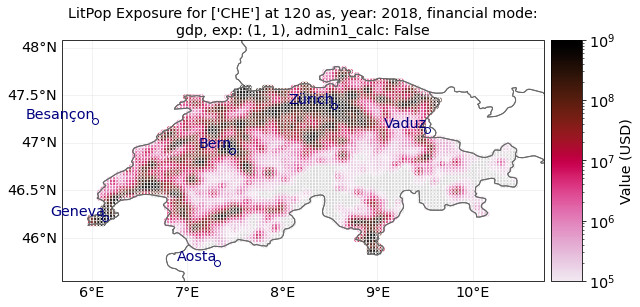

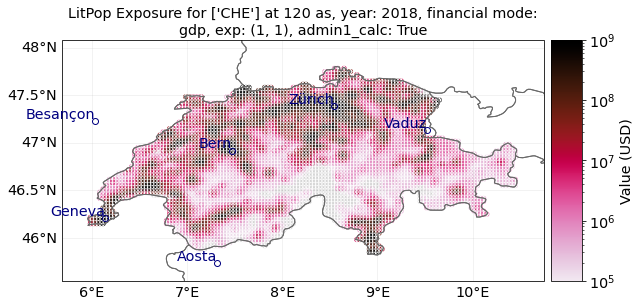

In [32]:
# Plotting:
from matplotlib import colors
norm=colors.LogNorm(vmin=1e5, vmax=1e9) # setting range for the log-normal scale
markersize = 5
ent_adm0.plot_hexbin(buffer=.3, norm=norm, linewidth=markersize)
ent_adm1.plot_hexbin(buffer=.3, norm=norm, linewidth=markersize)

print('admin-0: First figure')
print('admin-1: Second figure')
'''Do you spot the small differences in Graubünden (eastern Switzerland)?'''